In [1]:
import pandas as pd
fre = pd.read_csv('/Users/evelyn/Desktop/Frequency/fre.csv')


## SALM

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

X = fre[['TEMP','SLP','WDSP','PRCP','RH','SLP-STP','MSXPD-WDSP']]
y = fre['Salm']

ss = StandardScaler()
X_sc = ss.fit_transform(X)
X = pd.DataFrame(X_sc, columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
columns = X_train.columns

In [5]:
print('Proportional distribution of positive and negative samples in the training set before oversampling:')
print(y_train.value_counts())
print(y_train.value_counts()/len(y_train))
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_resample(X_train, y_train.values.ravel())
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y)
print('-------------------------------------------')
print('Proportional distribution of positive and negative samples in the training set after oversampling:')
print(os_data_y.value_counts())
print(os_data_y.value_counts()/len(os_data_y))


Proportional distribution of positive and negative samples in the training set before oversampling:
0    4463
1     796
Name: Salm, dtype: int64
0    0.84864
1    0.15136
Name: Salm, dtype: float64
-------------------------------------------
Proportional distribution of positive and negative samples in the training set after oversampling:
0    4463
1    4463
dtype: int64
0    0.5
1    0.5
dtype: float64


In [6]:
X=os_data_X[['TEMP','SLP','WDSP','PRCP','RH','SLP-STP','MSXPD-WDSP']]
y=os_data_y

ss = StandardScaler()
X_sc = ss.fit_transform(X)
X = pd.DataFrame(X_sc, columns = X.columns)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/evelyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [8]:
import statsmodels.api as sm
X=os_data_X[['TEMP','SLP','WDSP','PRCP','RH','SLP-STP','MSXPD-WDSP']]
y=os_data_y

ss = StandardScaler()
X_sc = ss.fit_transform(X)
X = pd.DataFrame(X_sc, columns = X.columns)


X2 = sm.add_constant(X)

logit_model=sm.Logit(y,X2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.642728
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.073      
Dependent Variable: 0.0000           AIC:              11489.9800 
Date:               2024-03-26 11:08 BIC:              11546.7538 
No. Observations:   8926             Log-Likelihood:   -5737.0    
Df Model:           7                LL-Null:          -6187.0    
Df Residuals:       8918             LLR p-value:      4.6060e-190
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
const          -0.0300    0.0225  -1.3370  0.1812  -0.0740   0.0140
TEMP            0.6890    0.0346  19.9093  0.0000

In [155]:
y_pred = logreg.predict(X_test)
print('Accuracy: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy: 0.62


<AxesSubplot:>

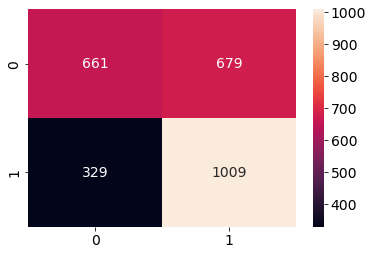

In [156]:
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d')

In [157]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.67      0.49      0.57      1340
         1.0       0.60      0.75      0.67      1338

    accuracy                           0.62      2678
   macro avg       0.63      0.62      0.62      2678
weighted avg       0.63      0.62      0.62      2678



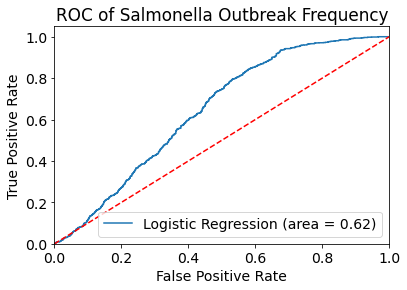

In [158]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Salmonella Outbreak Frequency')
plt.legend(loc="lower right")
plt.savefig('/Users/evelyn/Desktop/SF.jpg')
plt.show()

## Noro

In [129]:
fre = pd.read_csv('/Users/evelyn/Desktop/Frequency/fre.csv')


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.preprocessing import StandardScaler

X = fre[['TEMP','SLP','WDSP','PRCP','RH','SLP-STP','MSXPD-WDSP']]
y = fre['Noro']

ss = StandardScaler()
X_sc = ss.fit_transform(X)
X = pd.DataFrame(X_sc, columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
columns = X_train.columns

In [130]:
print('Proportional distribution of positive and negative samples in the training set before oversampling:')
print(y_train.value_counts())
print(y_train.value_counts()/len(y_train))
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_resample(X_train, y_train.values.ravel())
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y)
print('-------------------------------------------')
print('Proportional distribution of positive and negative samples in the training set after oversampling:')
print(os_data_y.value_counts())
print(os_data_y.value_counts()/len(os_data_y))


Proportional distribution of positive and negative samples in the training set before oversampling:
0.0    4801
1.0     458
Name: Noro, dtype: int64
0.0    0.912911
1.0    0.087089
Name: Noro, dtype: float64
-------------------------------------------
Proportional distribution of positive and negative samples in the training set after oversampling:
0.0    4801
1.0    4801
dtype: int64
0.0    0.5
1.0    0.5
dtype: float64


In [131]:
X=os_data_X[['TEMP','SLP','WDSP','PRCP','RH','SLP-STP','MSXPD-WDSP']]
y=os_data_y

ss = StandardScaler()
X_sc = ss.fit_transform(X)
X = pd.DataFrame(X_sc, columns = X.columns)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/evelyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [132]:
X=os_data_X[['TEMP','SLP','WDSP','PRCP','RH','SLP-STP','MSXPD-WDSP']]
y=os_data_y

ss = StandardScaler()
X_sc = ss.fit_transform(X)
X = pd.DataFrame(X_sc, columns = X.columns)


X2 = sm.add_constant(X)
import statsmodels.api as sm
logit_model=sm.Logit(y,X2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.652185
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.059      
Dependent Variable: 0.0000           AIC:              12540.5643 
Date:               2024-02-06 13:34 BIC:              12597.9221 
No. Observations:   9602             Log-Likelihood:   -6262.3    
Df Model:           7                LL-Null:          -6655.6    
Df Residuals:       9594             LLR p-value:      1.4210e-165
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
const         -0.0020    0.0213   -0.0953  0.9241  -0.0438   0.0397
TEMP          -0.0824    0.0295   -2.7938  0.0052

In [133]:
y_pred = logreg.predict(X_test)
print('Accuracy: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy: 0.62


<AxesSubplot:>

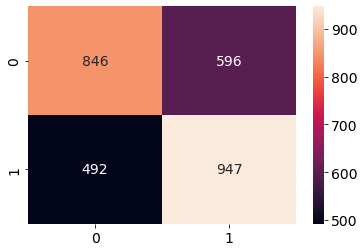

In [134]:
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d')

In [135]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.63      0.59      0.61      1442
         1.0       0.61      0.66      0.64      1439

    accuracy                           0.62      2881
   macro avg       0.62      0.62      0.62      2881
weighted avg       0.62      0.62      0.62      2881



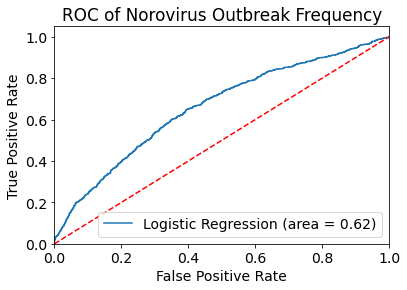

In [149]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Norovirus Outbreak Frequency')
plt.legend(loc="lower right")
plt.savefig('/Users/evelyn/Desktop/NF.jpg')

plt.show()

In [147]:
logit_roc_auc

0.6223905297156004

In [9]:
np.log(0.0001)

-9.210340371976182